# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 2381 Ивашинников Леонид Дмитриевич и Двиков Даниил Владиславович. Вариант №7.

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

Дискретный единичный скачок (аналог функции Хевисайда):  
$$
\sigma_d(k)=
\begin{cases}
1,&k\ge 0,\\
0,&k< 0
\end{cases}, \quad k\in \mathbb{Z}
$$

Дискретный прямоугольный импульс:  
$$
s_1(k)=
\begin{cases}
U, & n_0 \le k \le n_0 + n_{imp} - 1,\\
0, & \text{иначе}
\end{cases}
$$

Линейная комбинация дискретных гармонических сигналов:  
$$
s_2(k)=a_1x_1(k)+a_2x_2(k)+a_3x_3(k)
$$

где  
$$
x_i(k)=B_i\sin(\hat{\omega}_i k), \quad i=1,2,3
$$

Дискретный гармонический сигнал с экспоненциальной огибающей:  
$$
s_3(k)=C\cos(\hat{\omega}_0 k)
$$  
с огибающей  
$$
|a|^k
$$

Периодическая последовательность прямоугольных импульсов:  
$$
s_4(k)=\sum_{m=-\infty}^{\infty} s_1(k-mN)
$$


## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

In [168]:
import math
import numpy as np
import matplotlib.pyplot as plt

Nb = 7
N = 30 + Nb % 5
a = (-1)**Nb * (0.8 + 0.005 * (Nb % 20))
C = 1 + Nb % 5
w0 = math.pi / (6 + Nb % 5)
U = Nb % 20 + 1
n0 = 3 + Nb % 5
n_imp = 5 + Nb % 5
B1 = 1.5 + Nb % 5
B2 = 5.7 - Nb % 5
B3 = 2.2 + Nb % 5
w1 = math.pi / (4 + Nb % 5)
w2 = math.pi / (8 + Nb % 5)
w3 = math.pi / (16 + Nb % 5)
a1 = 1.5 - Nb % 5
a2 = 0.7 + Nb % 5
a3 = 1.4 + Nb % 5
print(f"Nb={Nb}, N={N}, a={a:.4f}, C={C}, U={U}")
print(f"n0={n0}, n_imp={n_imp}")
print(f"ŵ0=π/{6 + Nb % 5}={w0:.6f}")
print(f"B1={B1:.2f}, B2={B2:.2f}, B3={B3:.2f}")
print(f"ŵ1=π/{4 + Nb % 5}={w1:.6f}, ŵ2=π/{8 + Nb % 5}={w2:.6f}, ŵ3=π/{16 + Nb % 5}={w3:.6f}")
print(f"a1={a1:.2f}, a2={a2:.2f}, a3={a3:.2f}")


Nb=7, N=32, a=-0.8350, C=3, U=8
n0=5, n_imp=7
ŵ0=π/8=0.392699
B1=3.50, B2=3.70, B3=4.20
ŵ1=π/6=0.523599, ŵ2=π/10=0.314159, ŵ3=π/18=0.174533
a1=-0.50, a2=2.70, a3=3.40


### Задача 1

**Смоделировать дискретный прямоугольный импульс:**

$$
s_1(k) =
\begin{cases}
U, & n_0 \le k \le n_0 + n_{imp} - 1; \\
0, & \text{иначе}
\end{cases}
$$

на основе дискретного единичного скачка $ \sigma_d(k) $ из лабораторной работы №1, с выводом графика на интервале времени  $n \in [0, N - 1]$. Пояснить как выполняется моделирование импульса.

In [169]:
def sigma_d(k):
    return np.where(k >= 0, 1, 0)

def model_rect_impulse(N, U, n0, n_imp):
    n = np.arange(0, N)
    s1 = U * (sigma_d(n - n0) - sigma_d(n - (n0 + n_imp)))
    print(f"Импульс: U={U}, начало n₀={n0}, длина n_imp={n_imp}, N={N}")
    print(f"Диапазон времени: n ∈ [0, {N-1}]")
    return n, s1

Импульс: U=8, начало n₀=5, длина n_imp=7, N=32
Диапазон времени: n ∈ [0, 31]


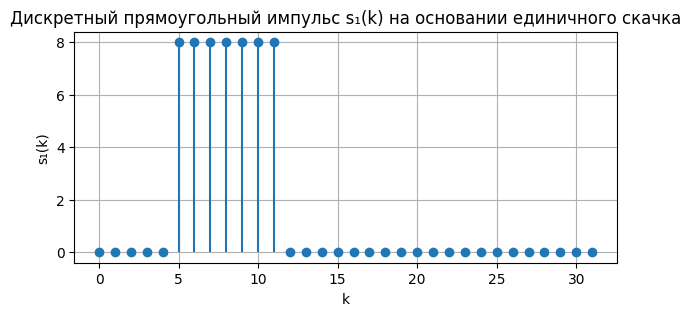

In [170]:
n, s1 = model_rect_impulse(N, U, n0, n_imp)
plt.figure(figsize=(7, 3))
plt.stem(n, s1, basefmt=" ")
plt.title("Дискретный прямоугольный импульс s₁(k) на основании единичного скачка")
plt.xlabel("k")
plt.ylabel("s₁(k)")
plt.grid(True)
plt.show()

**Пояснение к моделированию импульса**

Импульс моделируется с использованием дискретного единичного скачка:

$$
\sigma_d(k)
$$

Эта функция равна 0 при $k < 0$ и 1 при $k \ge 0$.

Для получения прямоугольного импульса используется разность двух сдвинутых скачков, умноженная на амплитуду $U$:

$$
s_1(k) = U \cdot (\sigma_d(k - n_0) - \sigma_d(k - (n_0 + n_{imp})))
$$

Первый элемент $\sigma_d(k - n_0)$ определяет момент включения импульса

Второй элемент $\sigma_d(k - (n_0 + n_{imp}))$ — момент его окончания. 
 
Разность этих функций формирует прямоугольный участок сигнала длиной $n_{imp}$, а умножение на $U$ задаёт требуемую амплитуду импульса.


### Задача 2

**Смоделировать линейную комбинацию дискретных гармонических сигналов** $s_2(k)$:

$$
s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k),
$$

где

$$
x_i(k) = B_i \sin(\hat{\omega}_i k), \quad i = 1, 2, 3,
$$

с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n \in [0, 5N - 1]$.
1. Вычислить:
   - среднее значение (идентификатор `mean_s2`);
   - энергию (идентификатор `E`);
   - среднюю мощность последовательности $s_2(k)$ (идентификатор `P`);
2. Пояснить:
   - а) операции при моделировании линейной комбинации сигналов $s_2(k)$;  
   - b) как определяют указанные характеристики.


In [171]:
# Вспомогательная функция для построения графиков
def stem_plot(position, signal, title, ylabel):
    plt.subplot(4, 1, position)
    markerline, stemlines, baseline = plt.stem(n, signal, basefmt=" ")
    plt.setp(markerline, 'markersize', 3, 'color', 'b')
    plt.setp(stemlines, 'color', 'b')
    plt.title(title)
    plt.xlabel("k")
    plt.ylabel(ylabel)
    plt.grid(True)

Среднее значение mean_s2 = 0.9482303675189673
Энергия E = 24233.79401294179
Средняя мощность P = 151.46121258088618


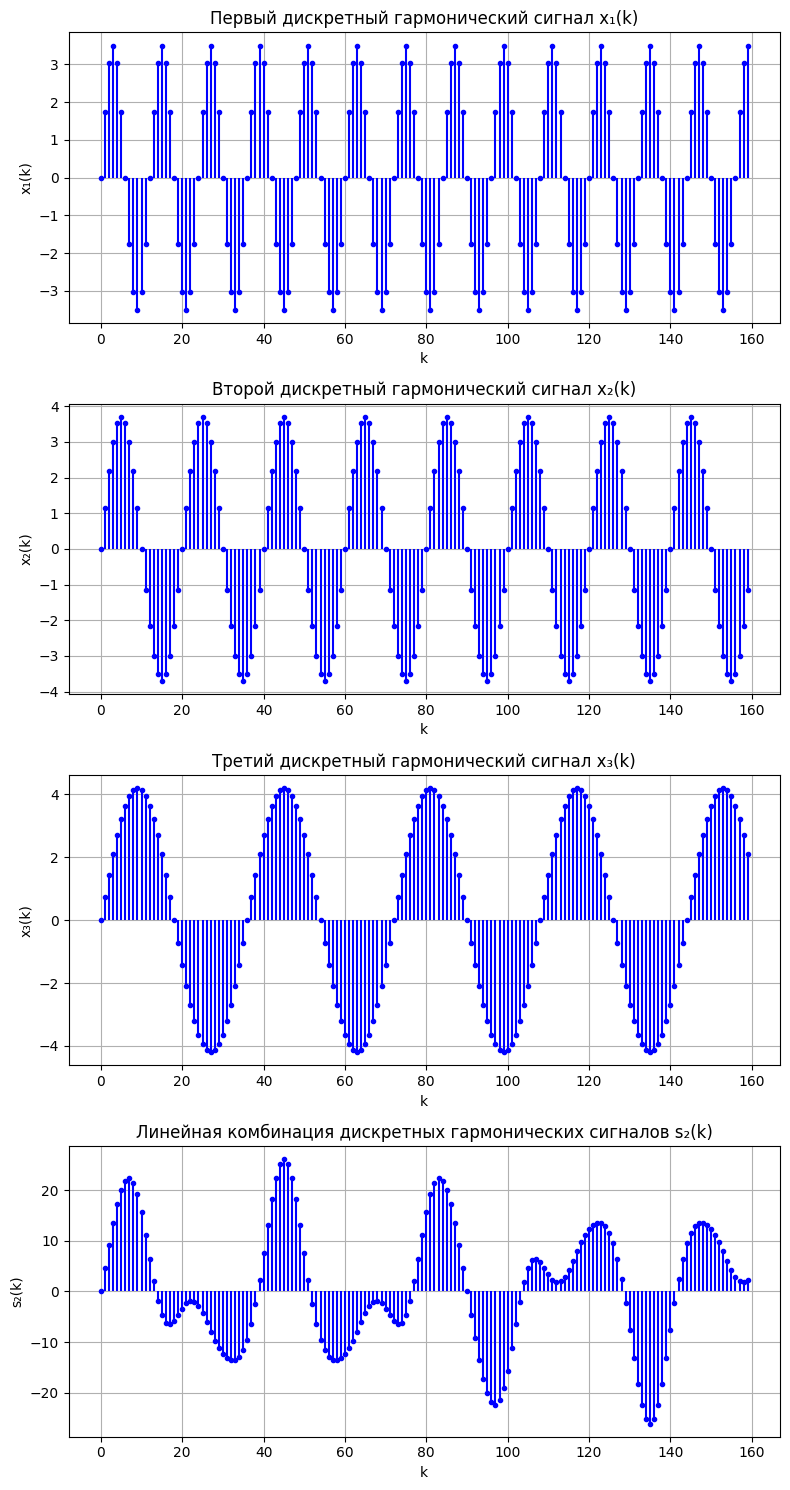

In [172]:
n = np.arange(0, 5 * N)

x1 = B1 * np.sin(w1 * n)
x2 = B2 * np.sin(w2 * n)
x3 = B3 * np.sin(w3 * n)

s2 = a1 * x1 + a2 * x2 + a3 * x3

mean_s2 = sum(s2) / (5 * N)
E = sum(s2[k] ** 2 for k in range(5 * N))
P = E / (5 * N)

print(f"Среднее значение mean_s2 = {mean_s2}")
print(f"Энергия E = {E}")
print(f"Средняя мощность P = {P}")


plt.figure(figsize=(8, 15))

stem_plot(1, x1, "Первый дискретный гармонический сигнал x₁(k)", "x₁(k)")
stem_plot(2, x2, "Второй дискретный гармонический сигнал x₂(k)", "x₂(k)")
stem_plot(3, x3, "Третий дискретный гармонический сигнал x₃(k)", "x₃(k)")
stem_plot(4, s2, "Линейная комбинация дискретных гармонических сигналов s₂(k)", "s₂(k)")

plt.tight_layout()
plt.show()


**Пояснение к моделированию линейной комбинации**

Результирующий сигнал формируется как сумма трёх гармонических последовательностей:

$$
s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k)
$$

где каждая из них задаётся выражением

$$
x_i(k) = B_i \sin(\hat{\omega}_i k), \quad i = 1, 2, 3
$$

Каждый сигнал имеет собственную амплитуду $B_i$ и частоту $\hat{\omega}_i$,  
а коэффициенты $a_i$ определяют вклад каждой гармоники в общий сигнал $s_2(k)$.

**Расчёт характеристик последовательности**

Так как моделирование выполняется на интервале времени $
n \in [0, 5N - 1],
$ то длина последовательности равна $5N$, и при вычислении характеристик используется именно это значение.

**Среднее значение:**

$$
mean\_s2 = \frac{1}{5N} \sum_{k=0}^{5N-1} s_2(k)
$$

**Энергия последовательности:**

$$
E = \sum_{k=0}^{5N-1} s_2^2(k)
$$

**Средняя мощность:**

$$
P = \frac{E}{5N}
$$


### Задача 3

Вывести график дискретного сигнала $s_3(k)$, **представляющего собой дискретный гармонический сигнал $s(k)$:

$$
s(k) = C \cos(\hat{\omega}_0 k)
$$

с экспоненциальной огибающей $|a|^k$  
на интервале времени $n \in [0, N - 1]$.

Необходимо:
1. Привести аналитическую формулу дискретного сигнала $s_3(k)$;  
2. Пояснить операции при его моделировании.


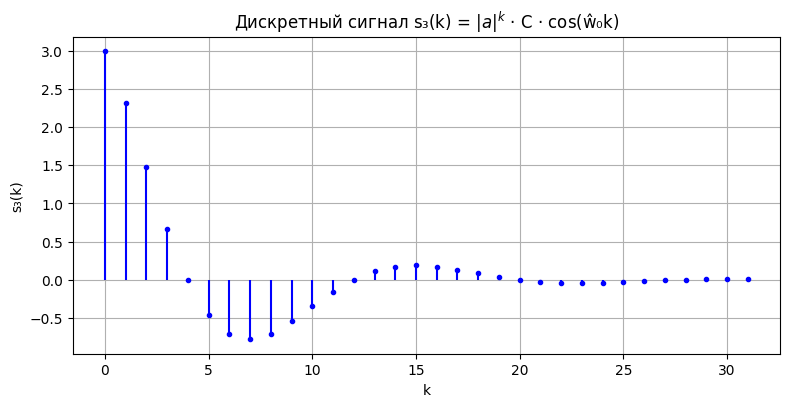

In [173]:
n = np.arange(0, N)
s3 = (abs(a) ** n) * (C * np.cos(w0 * n))
plt.figure(figsize=(8, 15))
stem_plot(1, s3, "Дискретный сигнал s₃(k) = $|a|^k$ · C · cos(ŵ₀k)", "s₃(k)")
plt.tight_layout()
plt.show()

**Пояснение к моделированию сигнала**

Сигнал $ s_3(k) $ описывается выражением:

$$
s_3(k) = |a|^{\,k} \, C \cos(\hat{\omega}_0 k)
$$

Он представляет собой гармонический сигнал с экспоненциальной огибающей $ |a|^k $.  
При $ |a| < 1 $ амплитуда затухает, при $ |a| > 1 $ — возрастает.

Моделирование выполняется путём вычисления огибающей $ |a|^k $ и умножения её на гармонический сигнал $ C \cos(\hat{\omega}_0 k) $,  

### Задача 4

Вывести график пяти периодов периодической последовательности $ s_4(k) $, дискретных прямоугольных импульсов** амплитуды $ U $ и длительности $ n_{imp} $,  с периодом, вдвое большим длительности импульса. Пояснить операции при моделировании периодической последовательности.


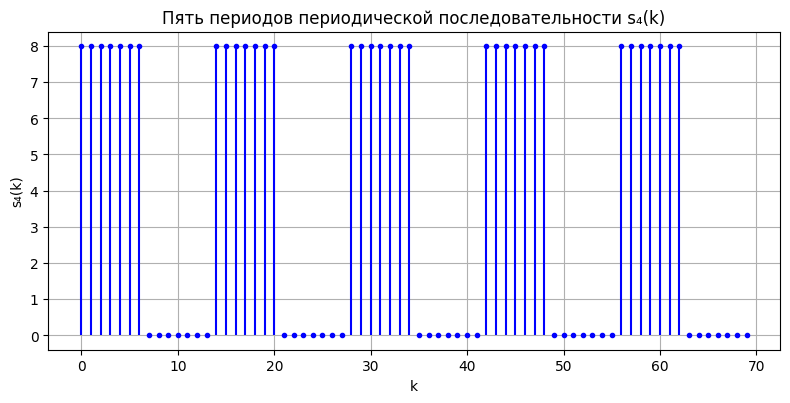

In [174]:
# Период вдвое больше длительности импульса
T = 2 * n_imp
# Строим ровно пять периодов
N_total = 5 * T
# Ось дискретного времени для этой задачи
n = np.arange(0, N_total)
# Периодическая прямоугольная последовательность s4(k)
s4 = [U if (k % T) < n_imp else 0 for k in n]
plt.figure(figsize=(8, 15))
stem_plot(1, s4, "Пять периодов периодической последовательности s₄(k)", "s₄(k)")
plt.tight_layout()
plt.show()

**Пояснение к моделированию периодической последовательности**

Периодическая последовательность $ s_4(k) $ формируется на основе прямоугольного импульса амплитуды $ U $ и длительности $ n_{imp} $.  
Период $ T $ выбран равным $ 2n_{imp} $, то есть между импульсами присутствует пауза той же длины.

При моделировании для каждого дискретного момента времени $ k $ вычисляется остаток $ k \bmod T $. Если остаток меньше $ n_{imp} $, в сигнал записывается значение $ U $; иначе — 0.

Таким образом, каждые $ T $ отсчётов повторяется одинаковый прямоугольный импульс, что даёт периодическую последовательность с пятью периодами.


## Выводы


В ходе лабораторной работы были изучены и реализованы на практике методы моделирования дискретных сигналов и их линейных комбинаций. Были построены и проанализированы различные виды дискретных последовательностей: единичный скачок, прямоугольный импульс, гармонические сигналы, сигнал с экспоненциальной огибающей, а также периодическая последовательность импульсов.

С помощью программных средств было проведено моделирование и визуализация сигналов на интервале дискретного времени. Полученные графики подтвердили теоретические зависимости и позволили наглядно оценить влияние параметров амплитуды, частоты и коэффициентов линейной комбинации на форму результирующего сигнал